###contents
- 결합탐색
- 조건탐색
- 변수탐색
- 인코딩
- 시각적 탐색

In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [ ]:
#con1 = pd.concat([df1,df2], axis = 0)
con1 = pd.concat([df1,df2], axis=0, ignore_index = True)
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [ ]:
con1 = pd.concat([df1,df2], axis=1)
con1

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1['ind'] = [1,2,3,4]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


In [ ]:
df2['ind'] =[1,2,3,4,5]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [ ]:
# merge()를 이용한 결합
pd.merge(df1,df2,on='ind',how='outer')
pd.merge(df1,df2,on='ind') #default 는 inner

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [ ]:
df1 = df1.drop('ind',axis=1)
df2 = df2.drop('ind', axis = 1)
print(df1, '\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [ ]:
# join은 인덱스 기준으로 결합 (default는 교집합)
#df1.join(df2, lsuffix='_1', rsuffix = '_2')
df1.join(df2, lsuffix = '_1', rsuffix = '_2',how='inner')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:

df1.join(df2, lsuffix = '_1', rsuffix = '_2',how='outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 주식 데이터를 가져와서 데이터 프레임 만들기
filepath1 = '/content/drive/MyDrive/kdt_240224/m3_분석라이브러리/pandas/data/dataset/stock price.xlsx'
filepath2 = '/content/drive/MyDrive/kdt_240224/m3_분석라이브러리/pandas/data/dataset/stock valuation.xlsx'
df1 = pd.read_excel(filepath1, engine = 'openpyxl', index_col= 'id')
df2 = pd.read_excel(filepath2, engine = 'openpyxl', index_col= 'id')

print(df1, '\n')
print(df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [ ]:
#데이터 프레임 결합 (join)
# df1 의 행 인덱스를 기준으로 결합하는 how='left' 옵션이 기본적용
df3 = df1.join(df2)
print(df3)

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN

In [ ]:
df4= df1.join(df2, how='right')
print(df4)

       stock_name          value     price       name           eps     bps  \
id                                                                            
130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   54068   
136480        NaN            NaN       NaN         하림    274.166667    3551   
138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   14894   
139480        이마트  239230.833333  254500.0        이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000.0        삼양사   5741.000000  108090   
161390        NaN            NaN       NaN      한국타이어   5648.500000   51341   
181710        NaN            NaN       NaN  NHN엔터테인먼트   2110.166667   78434   
185750        종근당   40293.666667  100500.0        종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667    5335   
207940        NaN            NaN       NaN   삼성바이오로직스   4644.166667   60099   

              per       pbr  
id                   

In [ ]:
# 데이터프레임 결합(join) - 교집합
# 두 데이터프레임에 공통으로 존재하는 행 인덱스르 기준으로 추출
df4 = df1.join(df2, how='inner')
print(df4)

       stock_name          value   price    name           eps     bps  \
id                                                                       
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

              per       pbr  
id                           
130960  15.695091  1.829178  
139480  13.931338  0.860437  
145990  14.283226  0.758627  
185750  25.185866  2.470259  
204210  40.802348  0.651359  


In [ ]:
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


Q. df4에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df5 이름으로 저장 및 출력하세요.(단, '<'와'=='를 반드시 사용해야 함)

In [ ]:
df4.drop('name', axis = 1, inplace = True)
df5 = df4[(df4['eps']<3000)| (df4['stock_name']=='이마트')]
df5

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [ ]:
import numpy as np
# np.random.seed(0)

data = np.arange(20).reshape(4,5)

df= pd.DataFrame(data, columns=['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1 = df.copy()
print(df1,'\n')
df1.drop(df1.index[0])

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19 



,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
idx = df1[df1.a>10].index
print(idx,'\n')
df1.drop(idx)

Index([3], dtype='int64') 



,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
df1 = df.copy()
#df1.index[0]
df1.drop(3)

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
cond1 = df.a>10
cond2 = df.b ==16
cond3 = df.e>15

df[cond1 &cond2&cond3]

,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
cond1 = df.a>5
cond2 = df.b ==16
cond3 = df.e>5
df[cond1 |cond2|cond3]

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df[cond1]
df[cond1][['a','b']]

,a,b
2,10,11
3,15,16


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tdf.rename(columns={'sex':'gender','fare':'ticket'}, inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 값 변경
# df.sex.repalce({'female':1,'male':0}, inplace =True)
df1 = tdf[['gender']].replace(['female','male'],[1,0])
df1.gender.value_counts()

gender
0    577
1    314
Name: count, dtype: int64

In [ ]:
# 칼럼 대문자 변경
tdf.rename(str.upper, axis='columns', inplace=True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df2 = df.copy()

In [ ]:
#컬럼 순서 변경
columns_customed = ['pclass','sex','age','survived']
df2[columns_customed].head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [ ]:
tdf1 = tdf[['age','ticket']].head()
tdf1

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
tdf1 = tdf1.astype({'age':'int','ticket':'int'})
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     5 non-null      int64
 1   ticket  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
tdf.age.value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
# age 컬럼의  값 구성 체크
age_counts_sorted = tdf.age.value_counts()
age_counts_sorted.sort_index()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [ ]:
# age 컬럼의 고유 구성 요소
len(tdf.age.unique())
tdf.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
import numpy as np
def get_category(age):
    if age>60:
        return 'Elderly'
    elif age>40:
        return 'Adult'
    elif age >20:
        return 'Young Adult'
    elif age >12:
        return 'Teenager'
    elif age > 5:
        return 'Child'
    elif age >0:
        return 'Baby'
    else:
        return 'UnKnown'
    'Baby','Child','Teenager','Young Adult','Adult','Elderly'

In [ ]:
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)
tdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Teenager
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Young Adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Teenager
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Young Adult


In [ ]:
tdf['age_cat'] = tdf.age.apply(lambda x:get_category(x))
tdf[['age','age_cat']]

,age,age_cat
0,22.0,Young Adult
1,38.0,Young Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
...,...,...
886,27.0,Young Adult
887,19.0,Teenager
888,NaN,UnKnown
889,26.0,Young Adult


범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [ ]:
tdf.gender.value_counts()

gender
male      577
female    314
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
#예제 데이터
data ={'color': ['red','blue','green','blue','red']}
df= pd.DataFrame(data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['gender','age']
for feature in features:
    tdf[feature]= le.fit_transform(tdf[feature])
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,cat,age_cat
0,0,3,1,28,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Teenager,Young Adult
1,1,1,0,51,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Young Adult
2,1,3,0,34,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult,Young Adult
3,1,1,0,47,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Young Adult,Young Adult
4,0,3,1,47,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Young Adult,Young Adult


In [ ]:
tdf2 = tdf[['gender','class']]
tdf2.head()


,gender,class
0,1,Third
1,0,First
2,0,Third
3,0,First
4,1,Third


In [ ]:
import pandas as pd
pd.get_dummies(tdf2).head()

,gender,class_First,class_Second,class_Third
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,True,False,False
4,1,False,False,True


Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

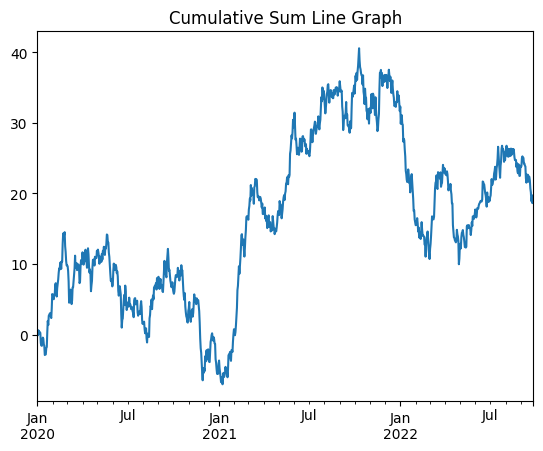

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 생성
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2020', periods = 1000))
ts = ts.cumsum()

#라인 그래프
ts.plot()
plt.title('Cumulative Sum Line Graph')
plt.show()

In [ ]:
num = np.random.randn(10000000000)
mean_val = num.mean()
std_dev = num.std()
print(mean_val , std_dev)

In [ ]:
df = pd.DataFrame({
    'A':np.random.rand(5),
    'B':np.random.rand(5)
}, index = ['one','two','three','four','five'])
print(df,'\n')
#막대 그래프
df.plot.bar()
plt.title('Bar Graph')
plt.show()

In [ ]:
df = pd.DataFrame({
    'A': np.random.randn(1000000),
    'B': np.random.randn(1000000)
})

print(df,'\n')
#히스토그램
df.plot.hist(alpha=0.5, bins = 300)
plt.title('Histogram')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#예제 데이터프레임 생성
df = pd.DataFrame({
    'A': np.random.randn(100000),
    'B': np.random.randn(100000)
})

# 그래프의 크기 설정
plt.figure(figsize=(12, 5))

# 첫 번째 히스토그램 (A)
plt.subplot(1, 2, 1)
df['A'].plot.hist(alpha=0.5, bins=30, color='blue')
plt.title('Histogram of A')

# 두 번째 히스토그램 (B)
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha=0.5, bins=30, color='green')
plt.title('Histogram of B')

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.rand(10,5), columns=['A','B','C','D','E'])
print(df, '\n')
#박스 플룻
df.plot.box()
plt.title('Box Plot')
plt.show()

          A         B         C         D
0  0.199473  0.979280  0.391368  0.937372
1  0.306690  0.787585  0.566991  0.385653
2  0.536711  0.450721  0.870759  0.144897
3  0.328647  0.642548  0.238844  0.619706
4  0.541194  0.581743  0.556471  0.792551 



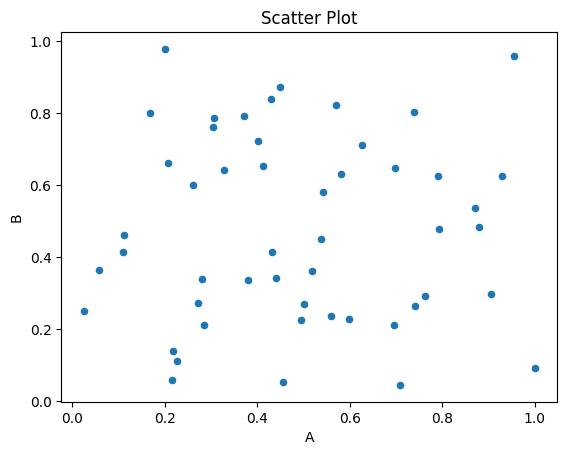

In [ ]:
df = pd.DataFrame(np.random.rand(50,4), columns = ['A','B','C','D'])

print(df.head(),'\n')
#산점도
df.plot.scatter(x='A', y='B')
plt.title('Scatter Plot')
plt.show()

In [ ]:
df = pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])

#양의 상관 관계
df['C'] = df['A']*2 + np.random.rand(50) * 0.5

#음의 상관 관계
df['D'] = -df['A'] * 2 + np.random.rand(50)* 0.5
fig, axs = plt.subplots(1,2,figsize=(14,6))

axs[0].scatter(df['A'], df['C'], color = 'blue')
axs[0].set_title('Positibe Correlation')
axs[0].set_xlabel('A')
axs[0].set_ylabel('C')

axs[1].scatter(df['A'],df['D'], color='red')
axs[0].set_title('Nagative Correlation')
axs[0].set_xlabel('A')
axs[0].set_ylabel('D')

plt.show()

In [ ]:
#커널 밀도 추정(KDE, Kernel Density Estimate) 그래프는 데이터의 분포를 부드럽게 나타내는 그래프
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 생성
data = pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000)+1
})
#KDE 그래프
data['A'].plot.kde(label='A')
data['B'].plot.kde(label='B')
plt.title('Kernel Density Estimate (KED) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

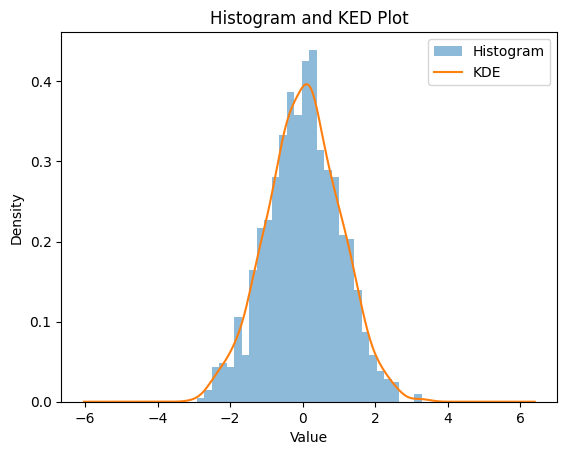

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 생성
data = pd.Series(np.random.randn(1000))

#히스토그램과 KDE 같이 그리기
ax = data.plot.hist(bins =30, alpha = 0.5, density = True,label = 'Histogram')#히스토그램
data.plot.kde(ax=ax, label = 'KDE') #KDE 그래프
plt.title('Histogram and KED Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()
df1 = df['survived'].value_counts()
df1

survived
0    809
1    500
Name: count, dtype: int64

Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요.

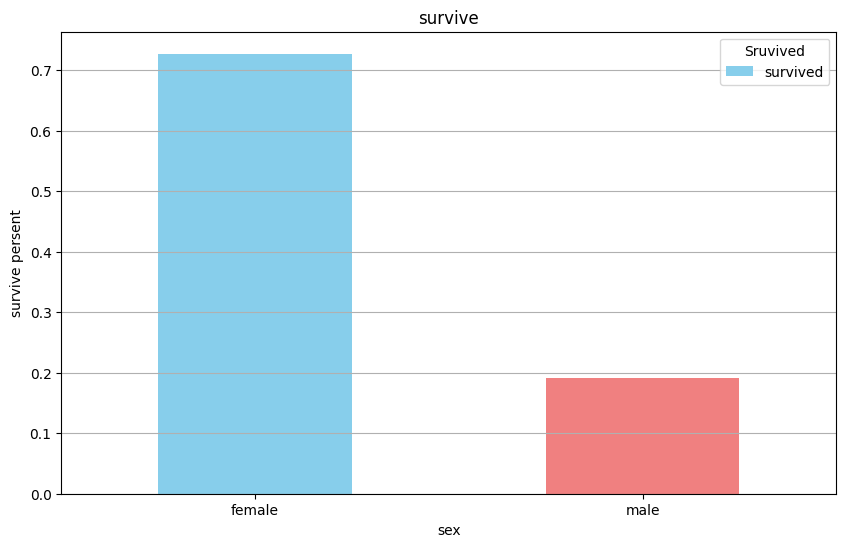

In [ ]:
# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('sex')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color=['skyblue','lightcoral'])
plt.title('survive')
plt.ylabel('survive persent')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

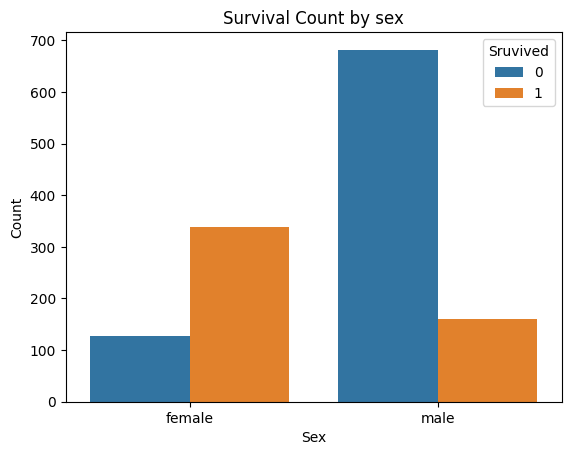

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별과 승객수 관계 시각화
sns.countplot(x = 'sex', hue = 'survived', data = df)
plt.title('Survival Count by sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title = 'Sruvived')

plt.show()

Q. 승객 등급과 생존율 관계를 pandas를 이용하여 시각화 하세요.

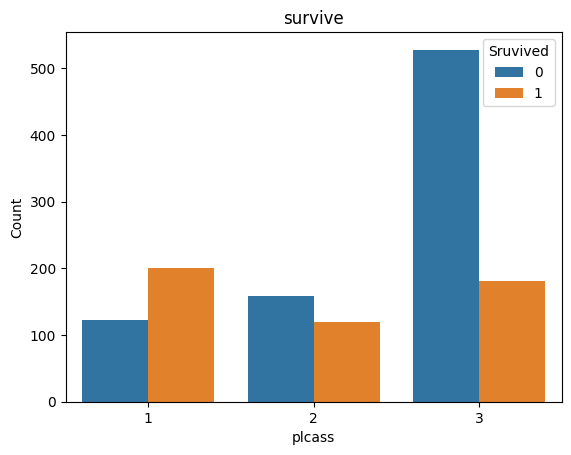

In [ ]:
sns.countplot(x='pclass', hue='survived', data =df)
plt.title('survive')
plt.xlabel('plcass')
plt.ylabel('Count')
plt.legend(title = 'Sruvived')
plt.show()

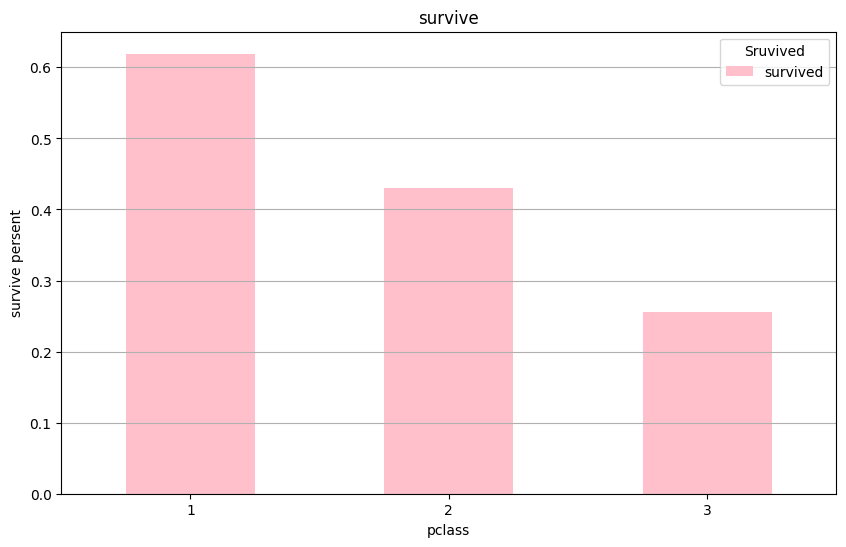

In [ ]:
data = df.groupby('pclass')['survived'].mean()
plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='pink')
plt.title('survive')
plt.ylabel('survive persent')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title = 'Sruvived')
plt.show()

Q. 나이와 생존율 관계를 시각화하여 출력하세요.

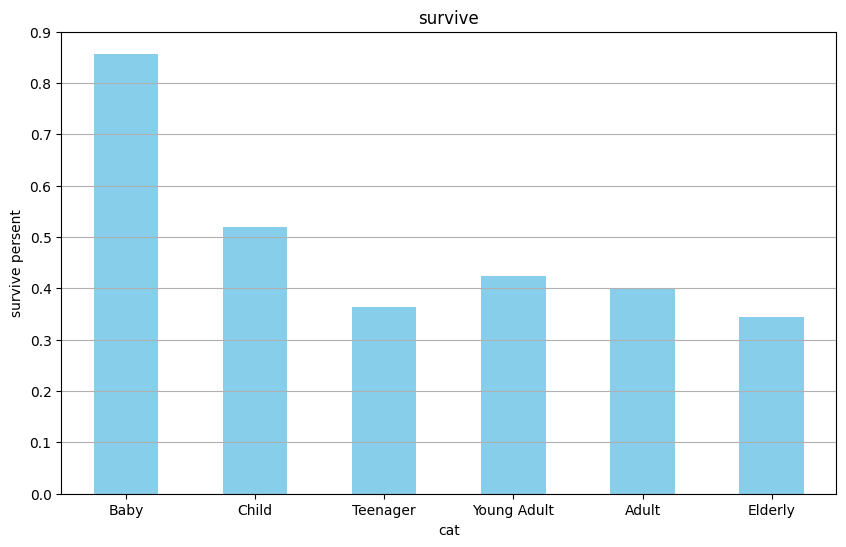

In [ ]:
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = df.age.fillna(0).values
df['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)

data = df.groupby('cat')['survived'].mean()
plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='skyblue')
plt.title('survive')
plt.ylabel('survive persent')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

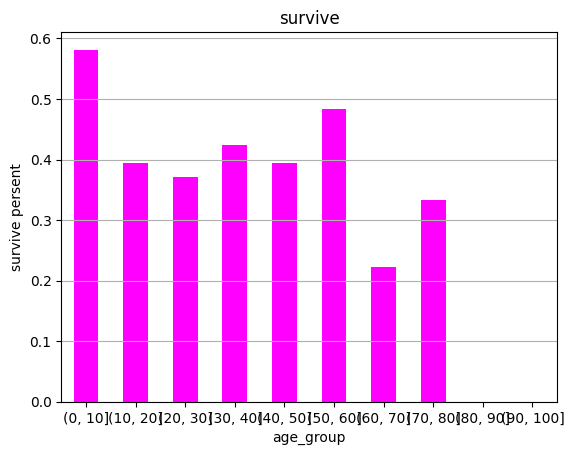

In [ ]:
df['age_group']= pd.cut(df['age'], bins = [0,10,20,30,40,50,60,70,80,90,100])

survival_by_age_group = df.groupby('age_group')['survived'].mean()

survival_by_age_group.plot(kind='bar', color='magenta')
plt.title('survive')
plt.ylabel('survive persent')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,mean_fare_by_pclass,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",87.508992,"(20.0, 30.0]"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",87.508992,"(0.0, 10.0]"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",87.508992,"(0.0, 10.0]"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",87.508992,"(20.0, 30.0]"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",87.508992,"(20.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,13.302889,"(10.0, 20.0]"
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,13.302889,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,13.302889,"(20.0, 30.0]"
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,13.302889,"(20.0, 30.0]"


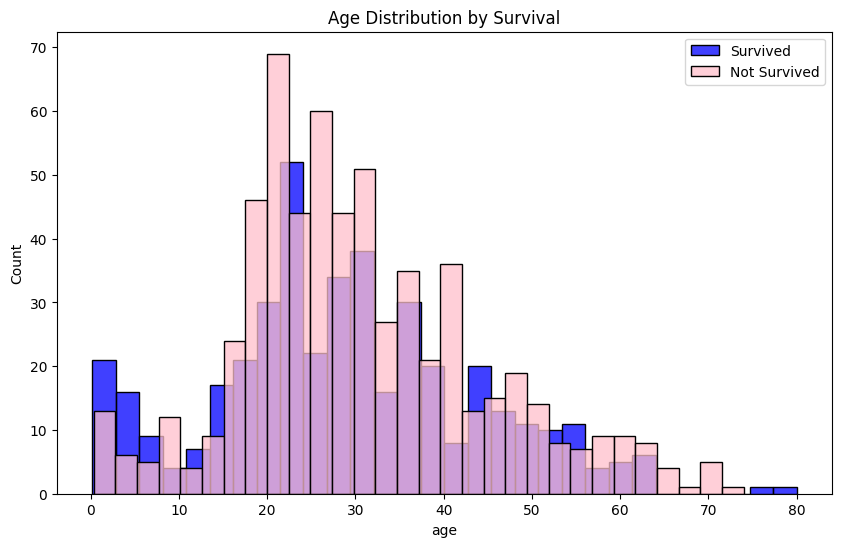

In [ ]:
# 나이와 생존, 사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived'] ==1]['age'], bins = 30 , kde = False, color='blue', label = 'Survived')
sns.histplot(df[df['survived'] == 0]['age'], bins= 30, kde = False, color = 'pink', label = 'Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend()
plt.show()

Q. 요금과 생존율 관계를 Pandas를 이용해 시각화하여 출력하세요.

{1: 87.50899164086687, 2: 21.179196389891697, 3: 13.302888700564973} 



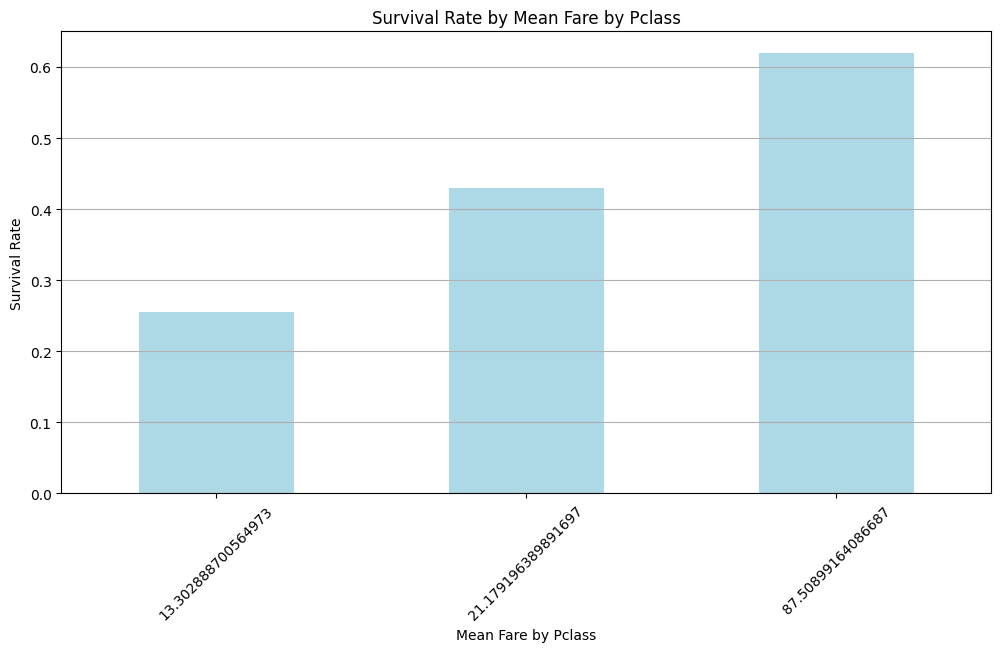

In [ ]:

mean_fare_by_pclass = df.groupby('pclass')['fare'].mean().to_dict()
print(mean_fare_by_pclass,'\n')

#객실 등급별 변수 요금 파생 변수 생성
df['mean_fare_by_pclass'] = df['pclass'].map(mean_fare_by_pclass)
df[['pclass','fare','mean_fare_by_pclass']].head()

# mean_fare_by_pclass와 생존 여부 간의 상관계수 계산
mean_fare_survival_correlation = df[['mean_fare_by_pclass', 'survived']].corr().iloc[0,1]

mean_fare_survival_correlation

 #생존율과 Mean Fare by Pclass 간의 막대그래프 그리기

# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

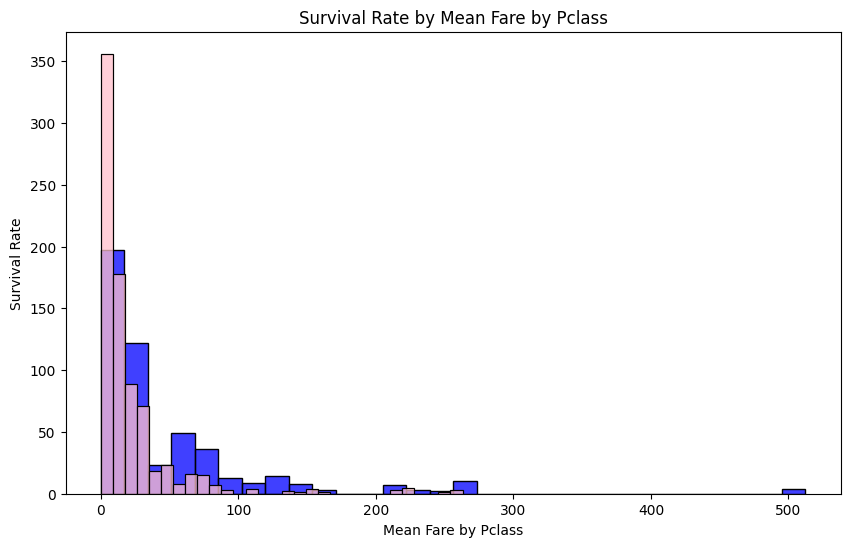

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['survived'] ==1]['fare'], bins = 30 , kde = False, color='blue', label = 'Survived')
sns.histplot(df[df['survived'] == 0]['fare'], bins= 30, kde = False, color = 'pink', label = 'Not Survived')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')

plt.show()

In [ ]:
df1 = df.groupby('fare')['survived']

In [ ]:
#산점도
df1.plot.scatter(x='A', y='B')
plt.title('Scatter Plot')
plt.show()

ValueError: plot kind scatter can only be used for data frames

Q. 가족 동반 여부와 생존율 관계를 시각화하여 출력하세요.

<Figure size 1000x600 with 0 Axes>

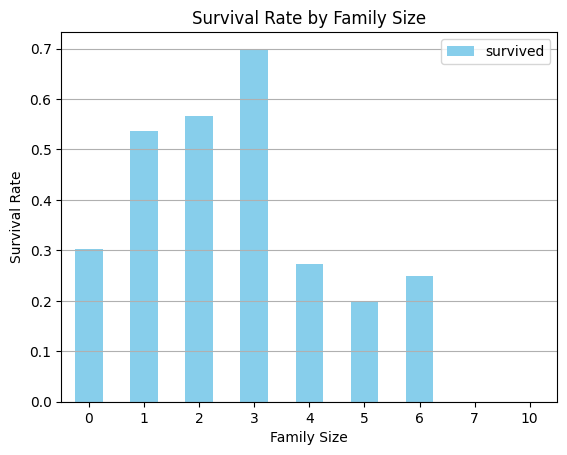

In [ ]:
df1=df.copy()
df1['동행자 수']= df.apply(lambda x: x['sibsp'] + x['parch'],axis=1)
df2 = df1.sort_values(by='동행자 수' ,ascending=False)
df2[['name','survived','동행자 수']].head(10)

df3=df2.groupby('동행자 수')[['survived']].mean()

plt.figure(figsize=(10, 6))
df3.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

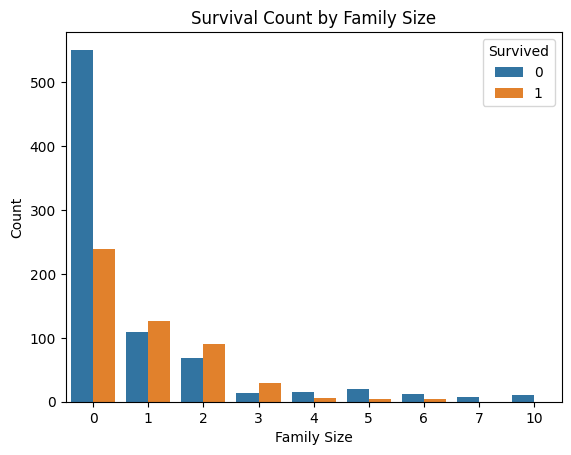

In [ ]:
# 가족 동반 여부와 생존사망자수 관계 시각화
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()